In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats.mstats import winsorize
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/chydv-hackathon-2025/train.csv")

In [3]:
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.7,0.61,0.00,2.1,0.088,10.0,26.0,0.99580,3.26,0.61,9.4,6.0
1,1,7.4,0.50,0.00,2.6,0.080,11.0,86.0,0.99760,3.36,0.54,9.2,6.0
2,2,5.5,0.64,0.02,1.7,0.073,12.0,27.0,0.99704,3.53,0.54,12.0,7.0
3,3,7.1,0.45,0.42,2.2,0.078,21.0,53.0,0.99578,3.02,0.53,9.5,5.0
4,4,8.7,0.63,0.18,2.4,0.077,11.0,26.0,0.99710,3.25,0.61,10.0,6.0


In [4]:
df.shape

(15000, 13)

In [5]:
df.isnull().sum()

id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   fixed acidity         15000 non-null  float64
 2   volatile acidity      15000 non-null  float64
 3   citric acid           15000 non-null  float64
 4   residual sugar        15000 non-null  float64
 5   chlorides             15000 non-null  float64
 6   free sulfur dioxide   15000 non-null  float64
 7   total sulfur dioxide  15000 non-null  float64
 8   density               15000 non-null  float64
 9   pH                    15000 non-null  float64
 10  sulphates             15000 non-null  float64
 11  alcohol               15000 non-null  float64
 12  quality               15000 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.5 MB


In [7]:
df.describe()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,8.150753,0.504877,0.232211,2.199445,0.078960,13.227133,37.122767,0.996915,3.322869,0.619162,10.186511,5.660533
std,4330.271354,1.420983,0.135287,0.176862,0.533989,0.015611,7.899479,23.806699,0.001392,0.115947,0.106109,0.900831,0.808541
min,0.000000,4.000000,0.180000,0.000000,1.100000,0.000000,1.000000,5.000000,0.990640,2.860000,0.390000,8.100000,3.000000
25%,3749.750000,7.200000,0.400000,0.050000,1.900000,0.073000,6.000000,19.000000,0.995900,3.240000,0.550000,9.500000,5.000000
50%,7499.500000,7.800000,0.500000,0.240000,2.100000,0.078000,12.000000,31.000000,0.996800,3.320000,0.600000,9.900000,6.000000
75%,11249.250000,8.900000,0.600000,0.380000,2.400000,0.084000,17.000000,48.000000,0.997800,3.390000,0.670000,10.800000,6.000000
max,14999.000000,37.000000,1.340000,0.760000,11.700000,0.415000,55.000000,289.000000,1.003690,4.010000,1.610000,14.000000,8.000000


In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [9]:
df["quality"].value_counts()

quality
5.0    6259
6.0    6108
7.0    1889
4.0     450
8.0     212
3.0      82
Name: count, dtype: int64

In [10]:
df.drop(columns=["id"],axis=1,inplace=True)

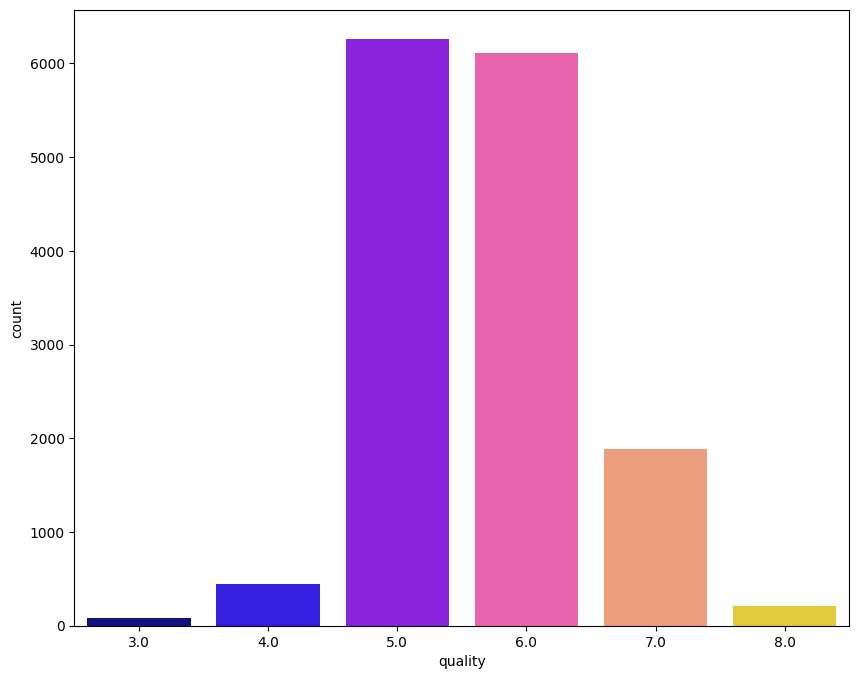

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(x="quality",data=df,palette="gnuplot2")
plt.show()

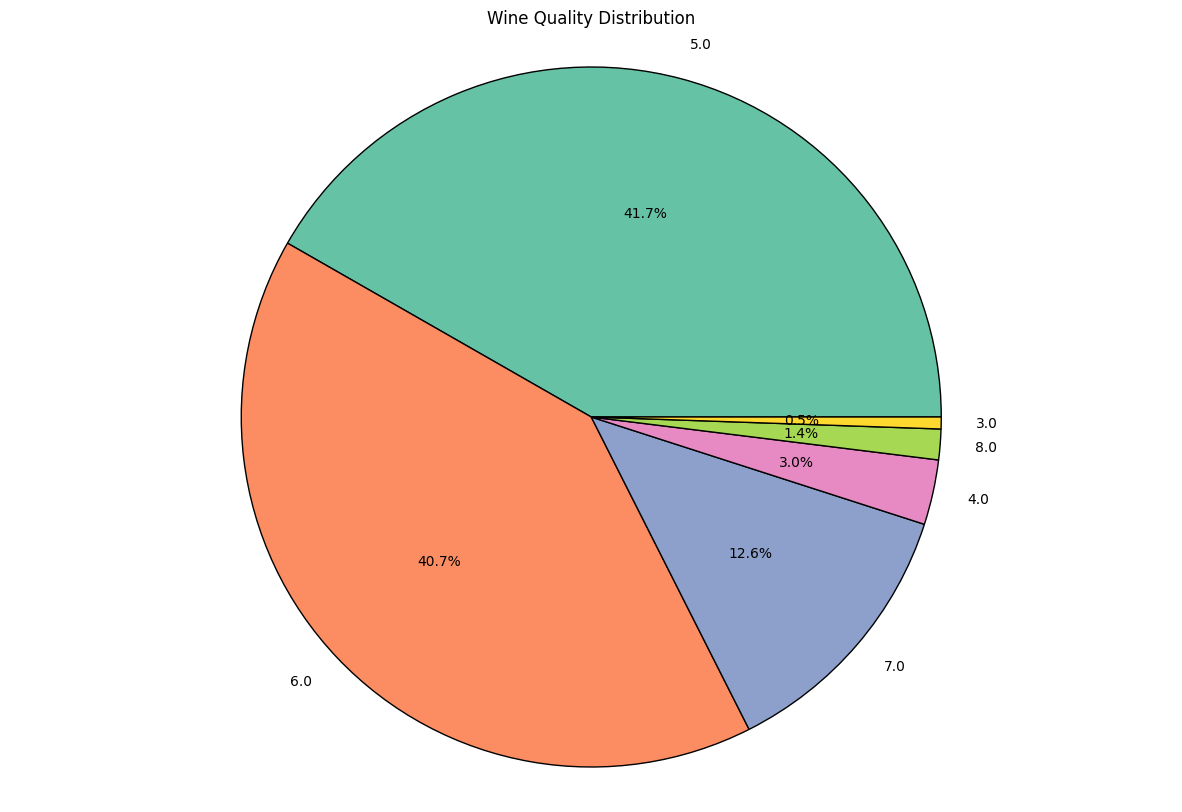

In [12]:
quality_counts = df['quality'].value_counts()

plt.figure(figsize=(15,10))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", 6).as_hex(), wedgeprops={'edgecolor': 'black'})
plt.gca().set_aspect('equal')
plt.title('Wine Quality Distribution')
plt.axis("equal")
plt.show()

In [13]:
final_df=df.copy()

# select imporant feature

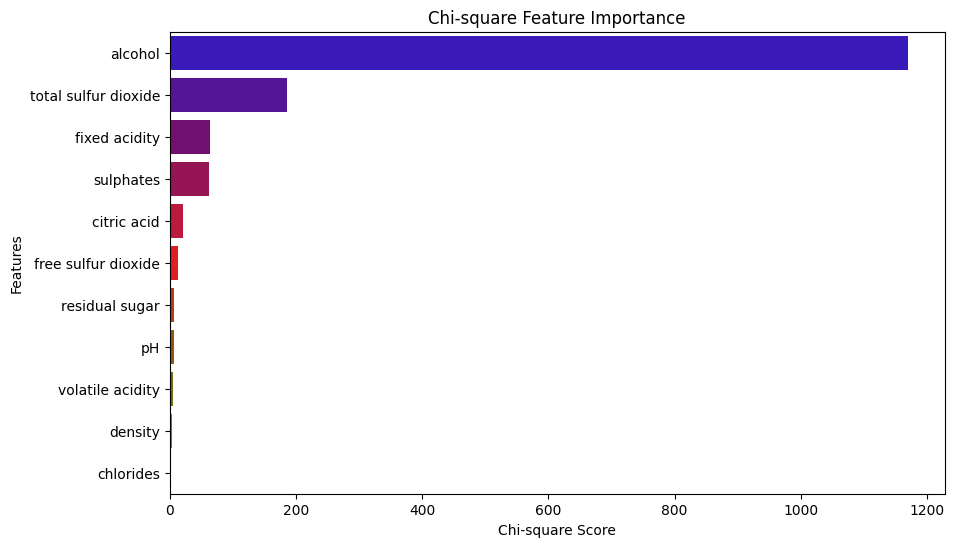

In [14]:
X = df.drop('quality', axis=1)
y = df['quality']

scaler = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=None)
X_discretized = scaler.fit_transform(X)

chi2_selector = SelectKBest(chi2, k='all')
X_kbest = chi2_selector.fit_transform(X_discretized, y)

chi2_values = chi2_selector.scores_
p_values = chi2_selector.pvalues_

chi2_df = pd.DataFrame({'feature': X.columns, 'chi2_value': chi2_values, 'p_value': p_values})
chi2_df = chi2_df.sort_values(by='chi2_value', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='chi2_value', y='feature', data=chi2_df, palette="brg")
plt.title('Chi-square Feature Importance')
plt.xlabel("Chi-square Score")
plt.ylabel("Features")
plt.show()

In [15]:
chi2_df.head()

,feature,chi2_value,p_value
10,alcohol,1169.208277,1.372205e-250
6,total sulfur dioxide,185.672158,3.286549e-38
0,fixed acidity,63.591198,2.195755e-12
9,sulphates,61.637234,5.574292e-12
2,citric acid,21.698958,5.972738e-04


# final_data

In [16]:
col=["alcohol","total sulfur dioxide","fixed acidity","sulphates","citric acid","free sulfur dioxide","quality"]

In [17]:
final_df=final_df[col]

In [18]:
final_df.head()

,alcohol,total sulfur dioxide,fixed acidity,sulphates,citric acid,free sulfur dioxide,quality
0,9.4,26.0,7.7,0.61,0.00,10.0,6.0
1,9.2,86.0,7.4,0.54,0.00,11.0,6.0
2,12.0,27.0,5.5,0.54,0.02,12.0,7.0
3,9.5,53.0,7.1,0.53,0.42,21.0,5.0
4,10.0,26.0,8.7,0.61,0.18,11.0,6.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

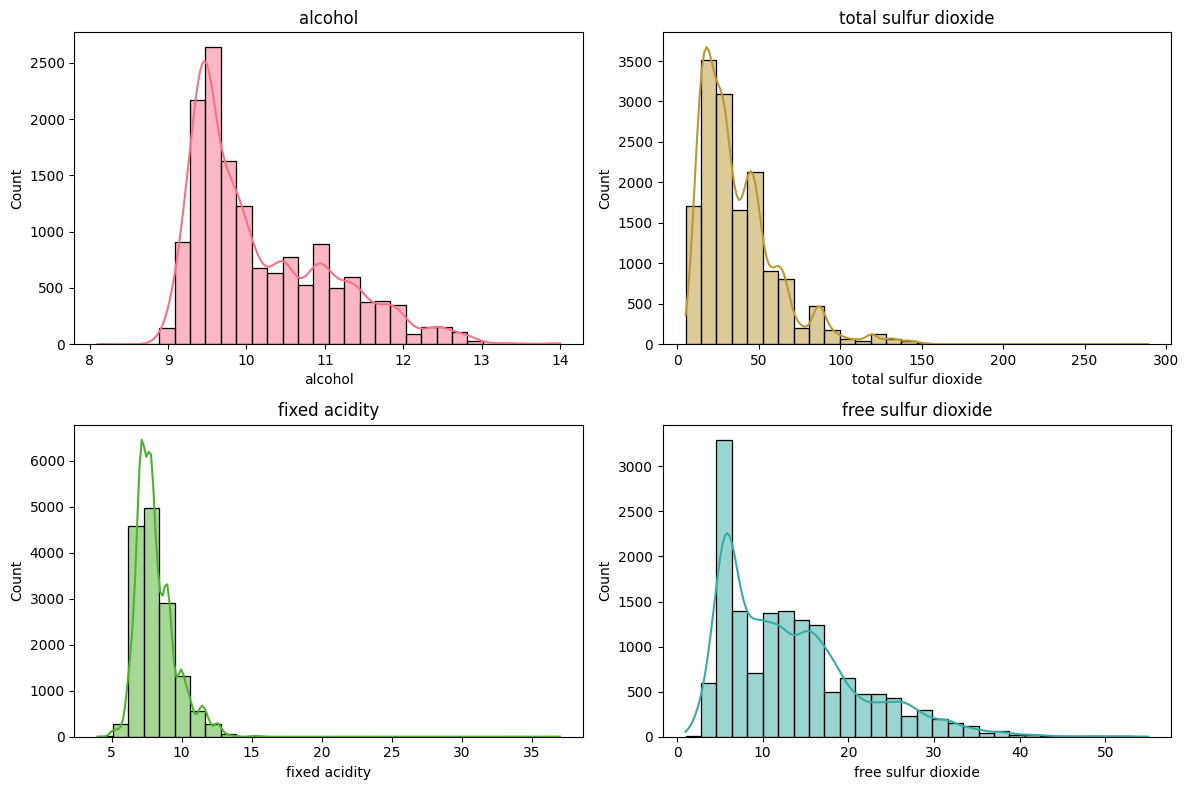

In [19]:

plt.figure(figsize=(12, 8))
for i, feature in enumerate(["alcohol", "total sulfur dioxide", "fixed acidity", "free sulfur dioxide"]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(final_df[feature], bins=30, kde=True, color=sns.color_palette("husl")[i])
    plt.title(feature)
plt.tight_layout()
plt.show()


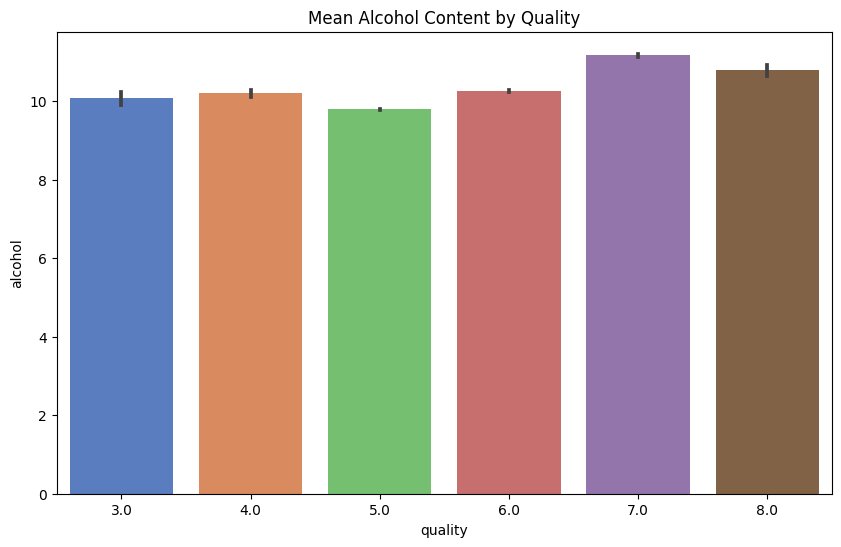

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x="quality", y="alcohol", data=final_df, palette="muted")
plt.title('Mean Alcohol Content by Quality')
plt.show()


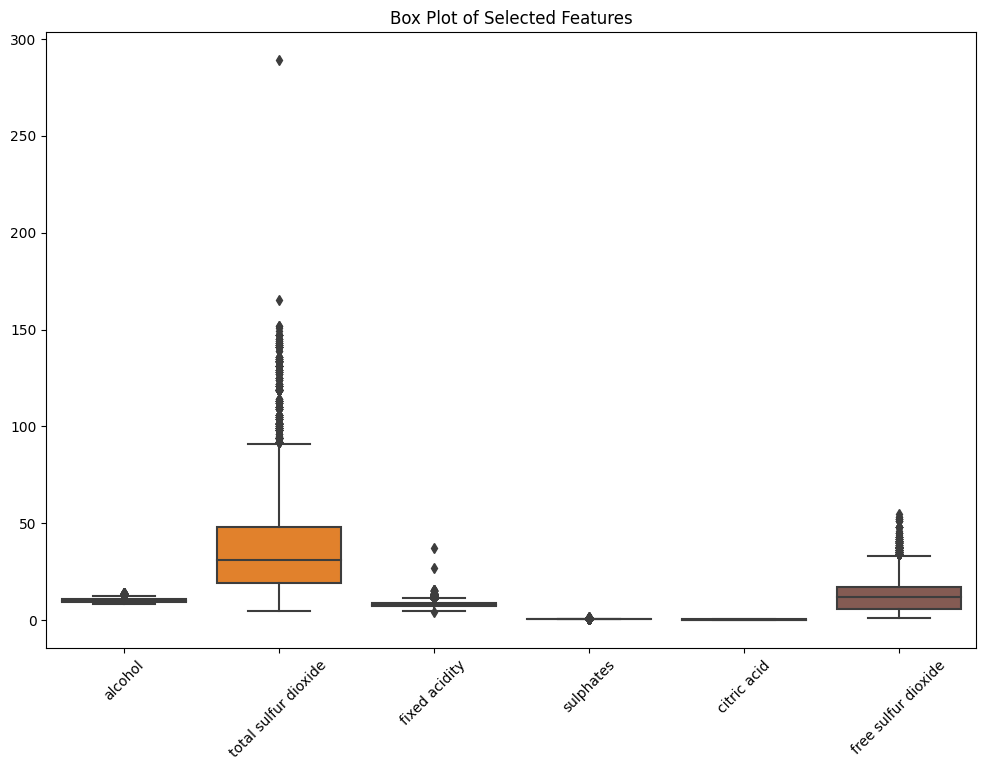

In [21]:
plt.figure(figsize=(12, 8))
features = ["alcohol", "total sulfur dioxide", "fixed acidity", "sulphates", "citric acid", "free sulfur dioxide"]
sns.boxplot(data=final_df[features])
plt.xticks(rotation=45)
plt.title("Box Plot of Selected Features")
plt.show()


In [22]:
final_df=final_df.rename({"total sulfur dioxide": "total_sulfur_dioxide"},axis=1)

# remove outliers

In [23]:
lower_bound = final_df["total_sulfur_dioxide"].quantile(0.05)
upper_bound = final_df["total_sulfur_dioxide"].quantile(0.95)

final_df["total_sulfur_dioxide"] = np.clip(final_df["total_sulfur_dioxide"], lower_bound, upper_bound)

lower_bound = final_df["fixed acidity"].quantile(0.05)
upper_bound = final_df["fixed acidity"].quantile(0.95)

final_df["fixed acidity"] = np.clip(final_df["fixed acidity"], lower_bound, upper_bound)


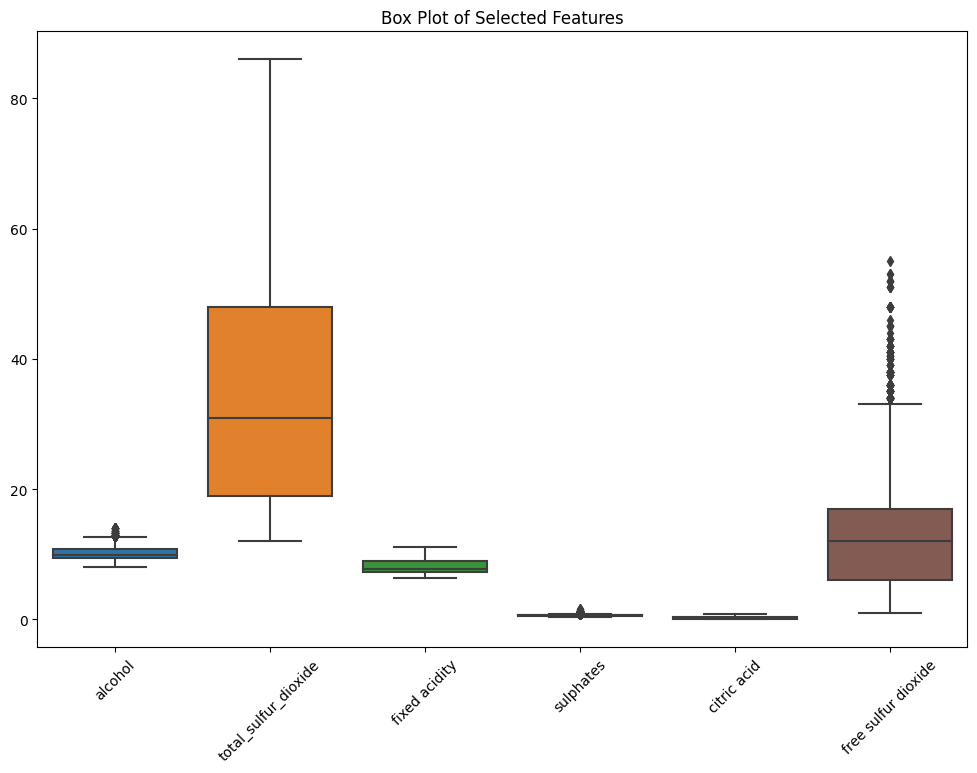

In [24]:
plt.figure(figsize=(12, 8))
features = ["alcohol", "total_sulfur_dioxide", "fixed acidity", "sulphates", "citric acid", "free sulfur dioxide"]
sns.boxplot(data=final_df[features])
plt.xticks(rotation=45)
plt.title("Box Plot of Selected Features")
plt.show()


In [25]:
final_df['sulfur_ratio'] = final_df['free sulfur dioxide'] / final_df['total_sulfur_dioxide']

In [26]:
new_col=["alcohol","total_sulfur_dioxide","fixed acidity","sulphates","citric acid","free sulfur dioxide","sulfur_ratio","quality"]

In [27]:
final_df=final_df[new_col]

In [28]:
print(final_df.corr()['quality'].sort_values(ascending=False))


quality                 1.000000
alcohol                 0.418514
sulfur_ratio            0.097670
sulphates               0.066780
fixed acidity           0.027261
citric acid             0.018969
free sulfur dioxide    -0.019368
total_sulfur_dioxide   -0.095374
Name: quality, dtype: float64


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_to_scale = ["alcohol", "total_sulfur_dioxide", "fixed acidity", 
                     "sulphates", "citric acid", "free sulfur dioxide", "sulfur_ratio"]

final_df[features_to_scale] = scaler.fit_transform(final_df[features_to_scale])


In [30]:
final_df.head()

,alcohol,total_sulfur_dioxide,fixed acidity,sulphates,citric acid,free sulfur dioxide,sulfur_ratio,quality
0,0.220339,0.189189,0.276596,0.180328,0.000000,0.166667,0.332357,6.0
1,0.186441,1.000000,0.212766,0.122951,0.000000,0.185185,0.097824,6.0
2,0.661017,0.202703,0.000000,0.122951,0.026316,0.203704,0.387018,7.0
3,0.237288,0.554054,0.148936,0.114754,0.552632,0.370370,0.342965,5.0
4,0.322034,0.189189,0.489362,0.180328,0.236842,0.185185,0.367496,6.0


In [31]:
X_1 = final_df.drop("quality", axis=1)
y_1 = final_df["quality"].astype(int)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_1, y_1, test_size=0.2, random_state=42, stratify=y)

# Catboost classifier

In [32]:
model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=100)
model.fit(X_train2, y_train2)

y_pred = model.predict(X_test2)

0:	learn: 1.7229770	total: 56.8ms	remaining: 28.3s
100:	learn: 1.0292542	total: 764ms	remaining: 3.02s
200:	learn: 1.0024941	total: 1.45s	remaining: 2.15s
300:	learn: 0.9751101	total: 2.13s	remaining: 1.41s
400:	learn: 0.9497950	total: 2.82s	remaining: 697ms
499:	learn: 0.9260262	total: 3.5s	remaining: 0us


In [33]:
accuracy = accuracy_score(y_test2, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5423


# GB classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [35]:
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy: ", accuracy)

Accuracy:  0.5426666666666666


In [36]:
df_test=pd.read_csv("/kaggle/input/chydv-hackathon-2025/test.csv")

In [37]:
df_test.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,15000,10.6,0.29,0.34,2.1,0.069,21.0,58.0,0.99910,3.28,0.56,9.5
1,15001,8.9,0.39,0.49,2.5,0.096,4.0,9.0,0.99720,3.26,0.53,10.0
2,15002,7.8,0.70,0.03,2.0,0.081,3.0,18.0,0.99870,3.41,0.56,12.6
3,15003,10.2,0.38,0.24,1.6,0.094,7.0,17.0,0.99562,3.15,0.62,9.9
4,15004,7.3,0.59,0.15,1.9,0.082,10.0,28.0,0.99472,3.28,0.74,10.0


In [38]:
Id=df_test.id

In [39]:
col=["alcohol","total sulfur dioxide","fixed acidity","sulphates","citric acid","free sulfur dioxide"]
df_test=df_test[col]

In [40]:
df_test.head()

,alcohol,total sulfur dioxide,fixed acidity,sulphates,citric acid,free sulfur dioxide
0,9.5,58.0,10.6,0.56,0.34,21.0
1,10.0,9.0,8.9,0.53,0.49,4.0
2,12.6,18.0,7.8,0.56,0.03,3.0
3,9.9,17.0,10.2,0.62,0.24,7.0
4,10.0,28.0,7.3,0.74,0.15,10.0


In [41]:
df_test['sulfur_ratio'] = df_test['free sulfur dioxide'] / df_test['total sulfur dioxide']

In [42]:
df_test=df_test.rename({"total sulfur dioxide": "total_sulfur_dioxide"},axis=1)

In [43]:
df_test.head()

,alcohol,total_sulfur_dioxide,fixed acidity,sulphates,citric acid,free sulfur dioxide,sulfur_ratio
0,9.5,58.0,10.6,0.56,0.34,21.0,0.362069
1,10.0,9.0,8.9,0.53,0.49,4.0,0.444444
2,12.6,18.0,7.8,0.56,0.03,3.0,0.166667
3,9.9,17.0,10.2,0.62,0.24,7.0,0.411765
4,10.0,28.0,7.3,0.74,0.15,10.0,0.357143


In [44]:
prediction=model.predict(df_test)
prediction=prediction.flatten()
submission=pd.DataFrame({"id":Id,"quality":prediction})
submission.to_csv("submission.csv",index=False)

In [45]:
submission.head()

,id,quality
0,15000,7
1,15001,7
2,15002,7
3,15003,7
4,15004,7
